In [17]:
# Načtení knihoven a dat
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns


# https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016?resource=download&select=master.csv
df = pd.read_csv("D:/API/MSW/master.csv")
# https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/
world = gpd.read_file("D:/API/MSW/ne_10m_admin_0_countries.shp")

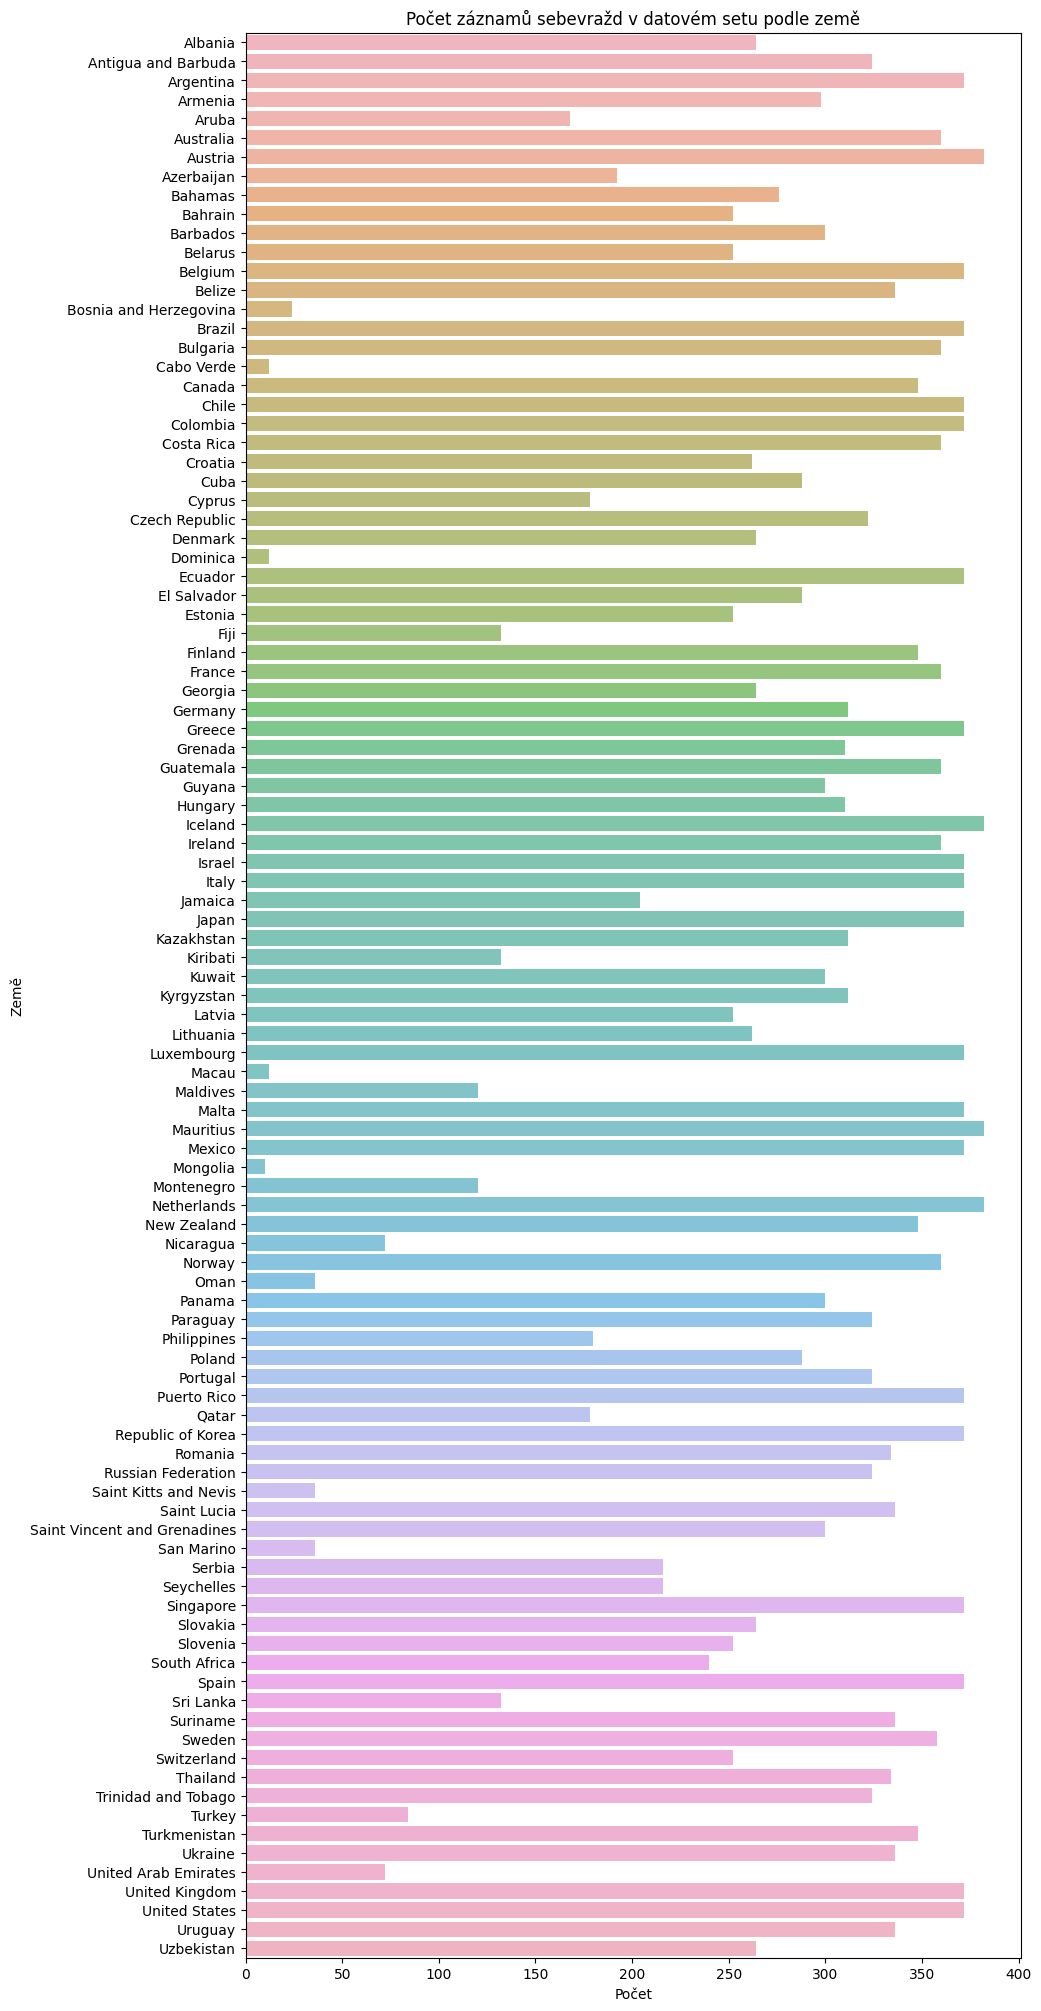

In [18]:
# Graf 1
plt.figure(figsize=(10,25))
sns.countplot(y ='country', data=df, alpha=0.7)
plt.title('Počet záznamů sebevražd v datovém setu podle země')
plt.xlabel("Počet")
plt.ylabel("Země")
plt.show()

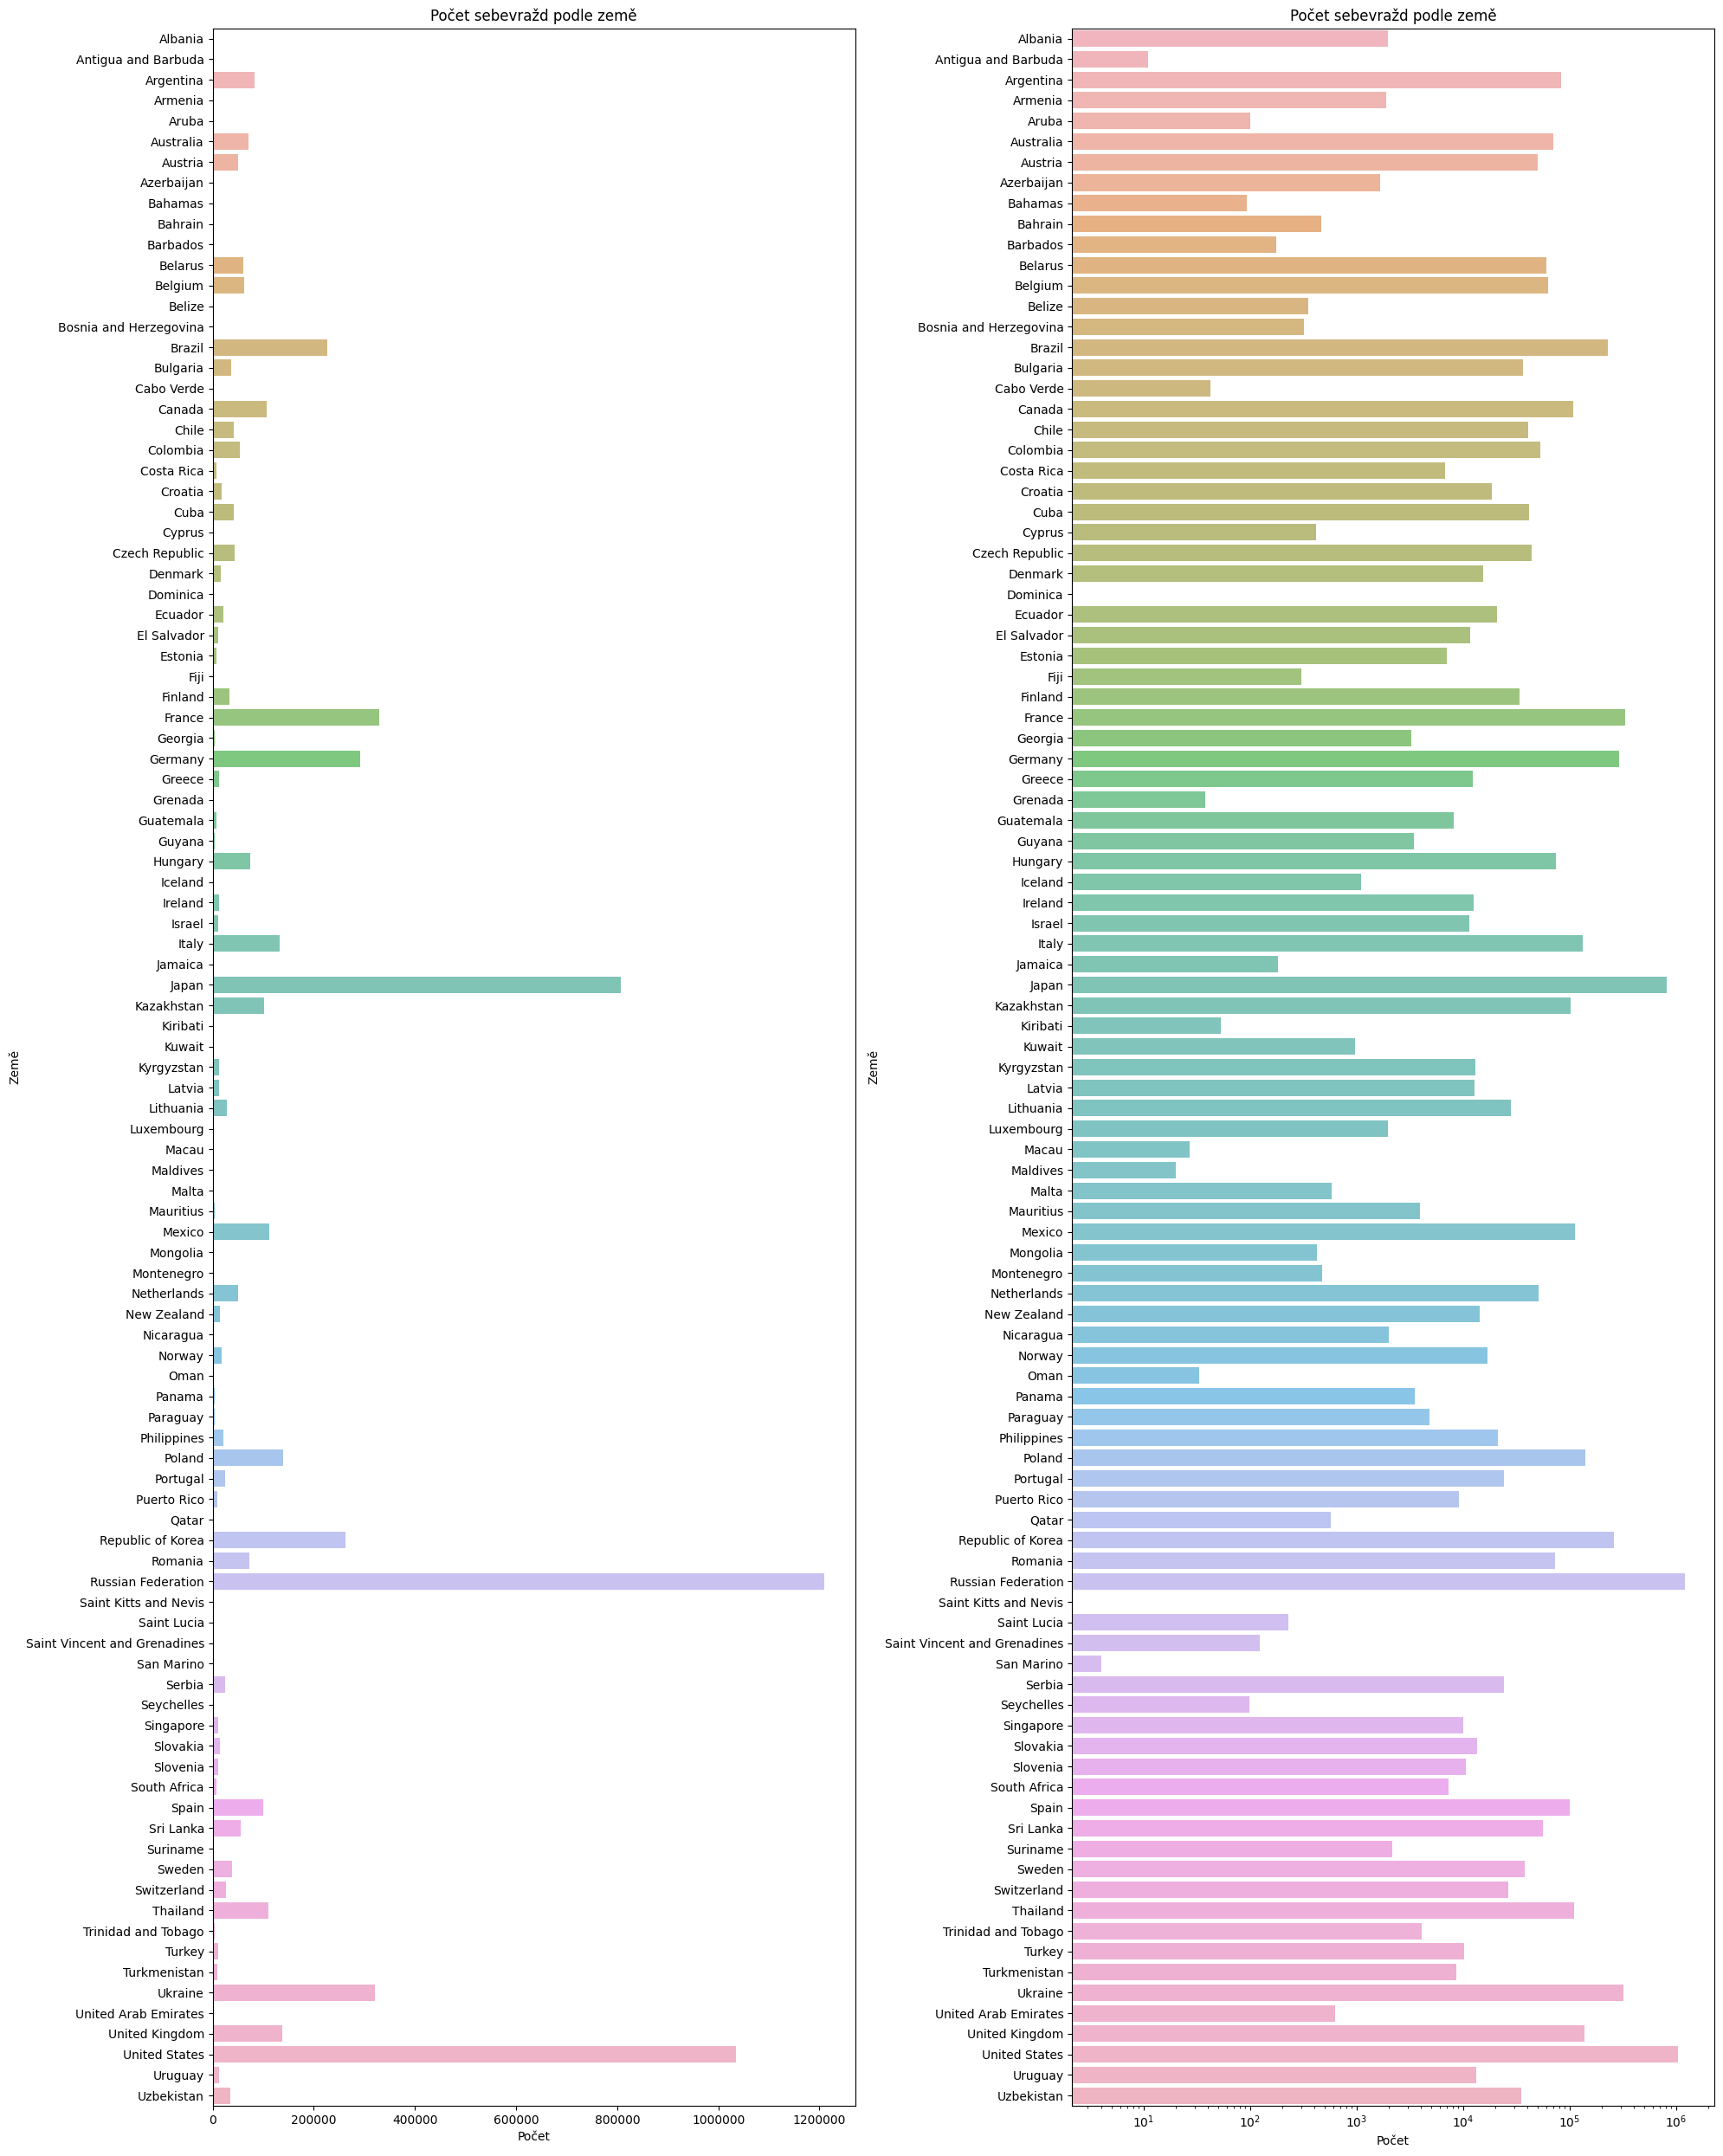

In [19]:
# Graf 2
seskupeny4 = df.groupby(['country'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(20,25))
plt.subplot(1, 2, 1)
sns.barplot(x = 'suicides_no', y ='country', data=seskupeny4, alpha=0.7)
plt.title('Počet sebevražd podle země')
plt.xlabel("Počet")
plt.ylabel("Země")
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 2, 2)
sns.barplot(x = 'suicides_no', y ='country', data=seskupeny4, alpha=0.7)
plt.title('Počet sebevražd podle země')
plt.xlabel("Počet")
plt.ylabel("Země")
plt.xscale("log")

plt.tight_layout()
plt.show()

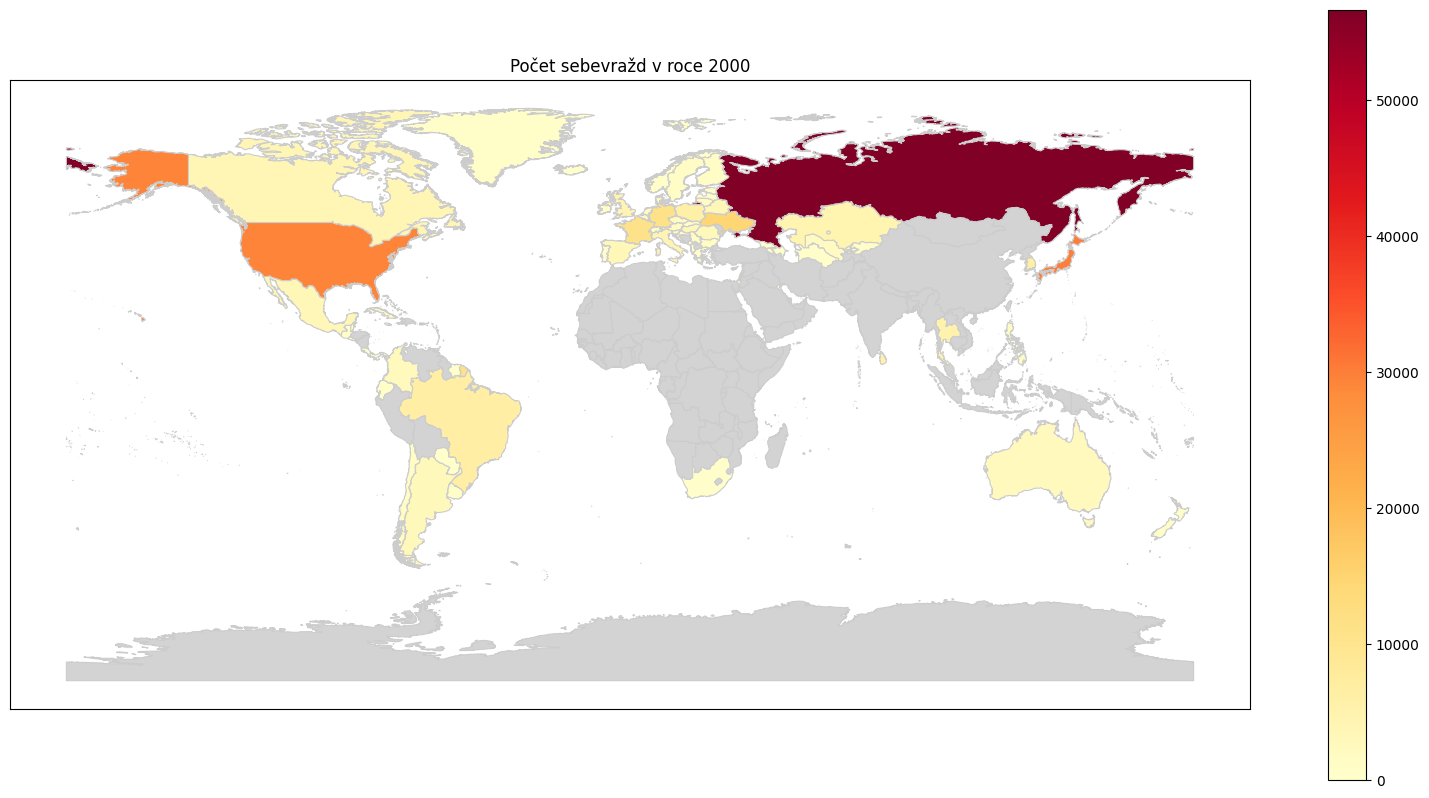

In [20]:
# Graf 3
rok = 2000
world['SOVEREIGNT'] = world['SOVEREIGNT'].str.lower().str.strip()
df_2015 = df[df['year'] == rok]
df1 = df_2015[['country', 'suicides_no']]
df1 = df1.groupby('country').sum().reset_index().rename(columns={'suicides_no': 'total_suicides'})
df1['country'] = df1['country'].str.lower().str.strip()
mapping = {
    'united states': 'united states of america',
    'czech republic':'czechia',
    'serbia':'republic of serbia',
    'russian federation':'russia',
    'republic of korea':'south korea',
}
df1['country'].replace(mapping, inplace=True)
merged_data = world.merge(df1, left_on='SOVEREIGNT', right_on='country', how='left')
no_data_color = 'lightgray'
fig, ax = plt.subplots(figsize=(20, 10))
merged_data.plot(column='total_suicides', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': no_data_color})
plt.title('Počet sebevražd v roce 2000')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

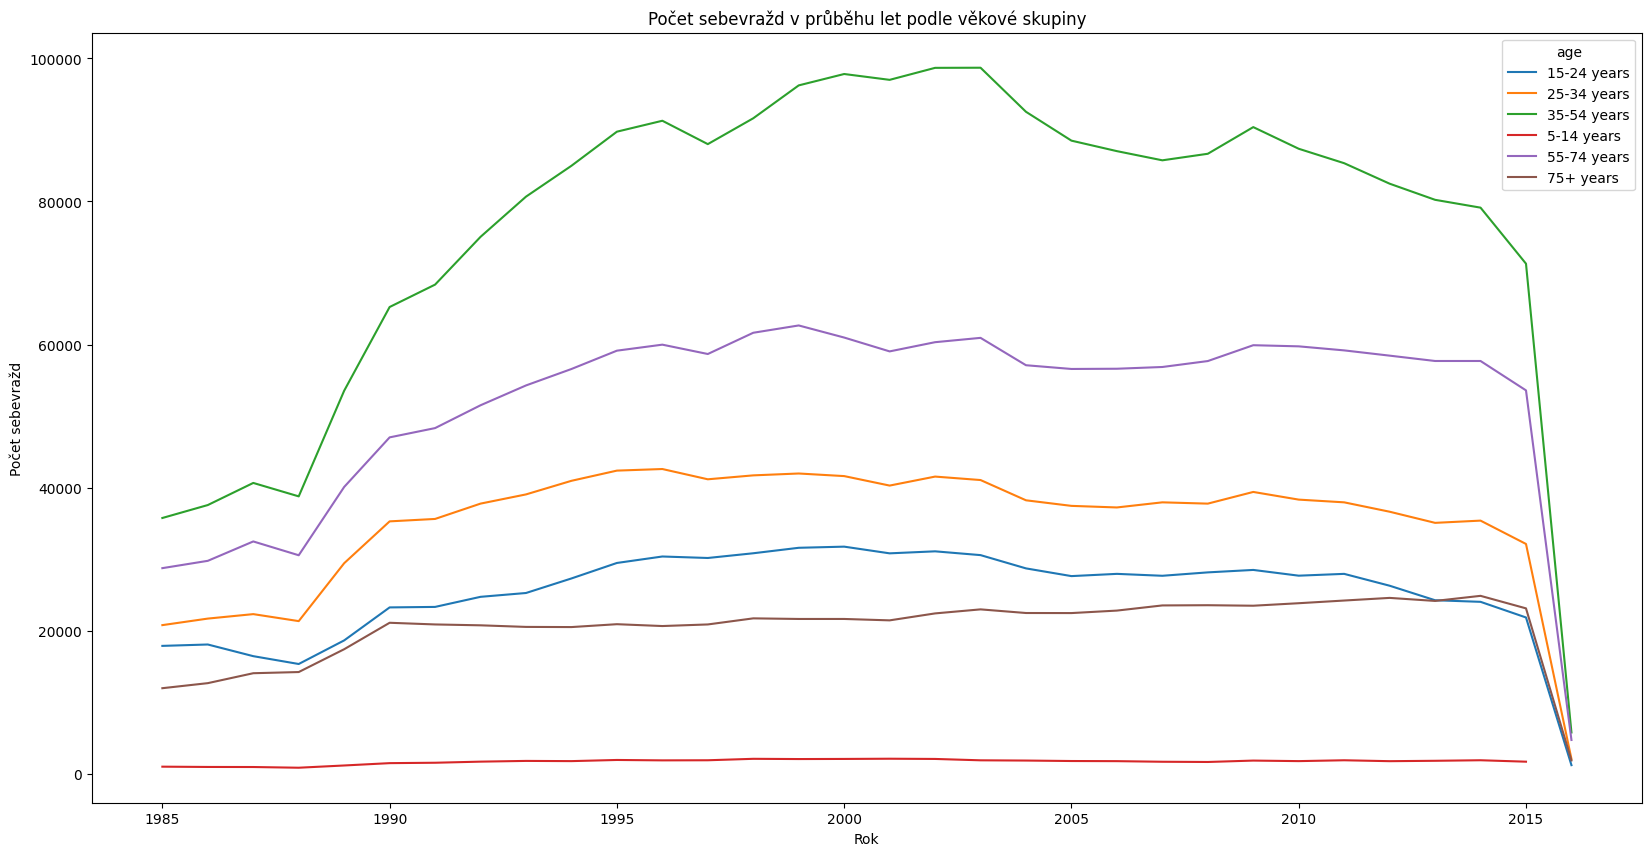

In [21]:
# Graf 4
seskupeny = df.groupby(['year', 'age'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(20, 10))
sns.lineplot(x='year', y='suicides_no', hue='age', data=seskupeny)
plt.xlabel('Rok')
plt.ylabel('Počet sebevražd')
plt.title('Počet sebevražd v průběhu let podle věkové skupiny')
plt.show()

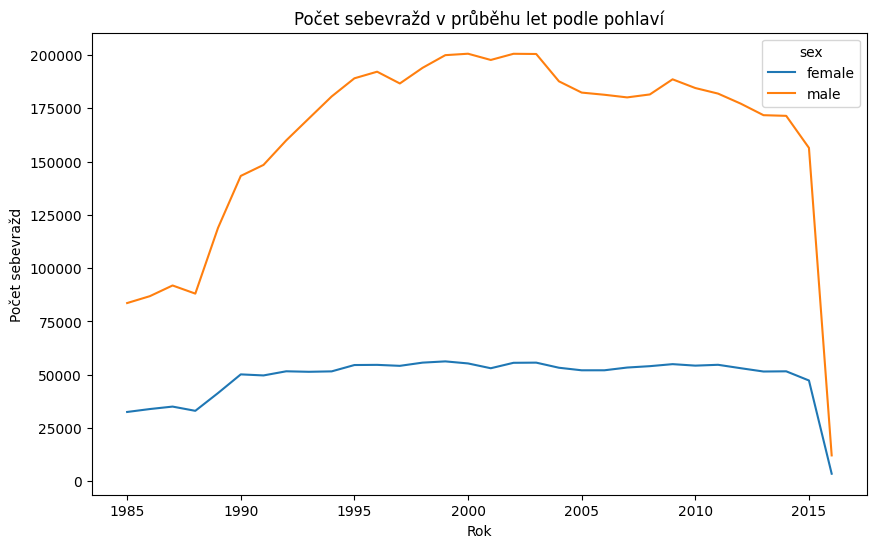

In [22]:
# Graf 5
seskupeny2 = df.groupby(['year', 'sex'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='suicides_no', hue='sex', data=seskupeny2)
plt.xlabel('Rok')
plt.ylabel('Počet sebevražd')
plt.title('Počet sebevražd v průběhu let podle pohlaví')
plt.show()

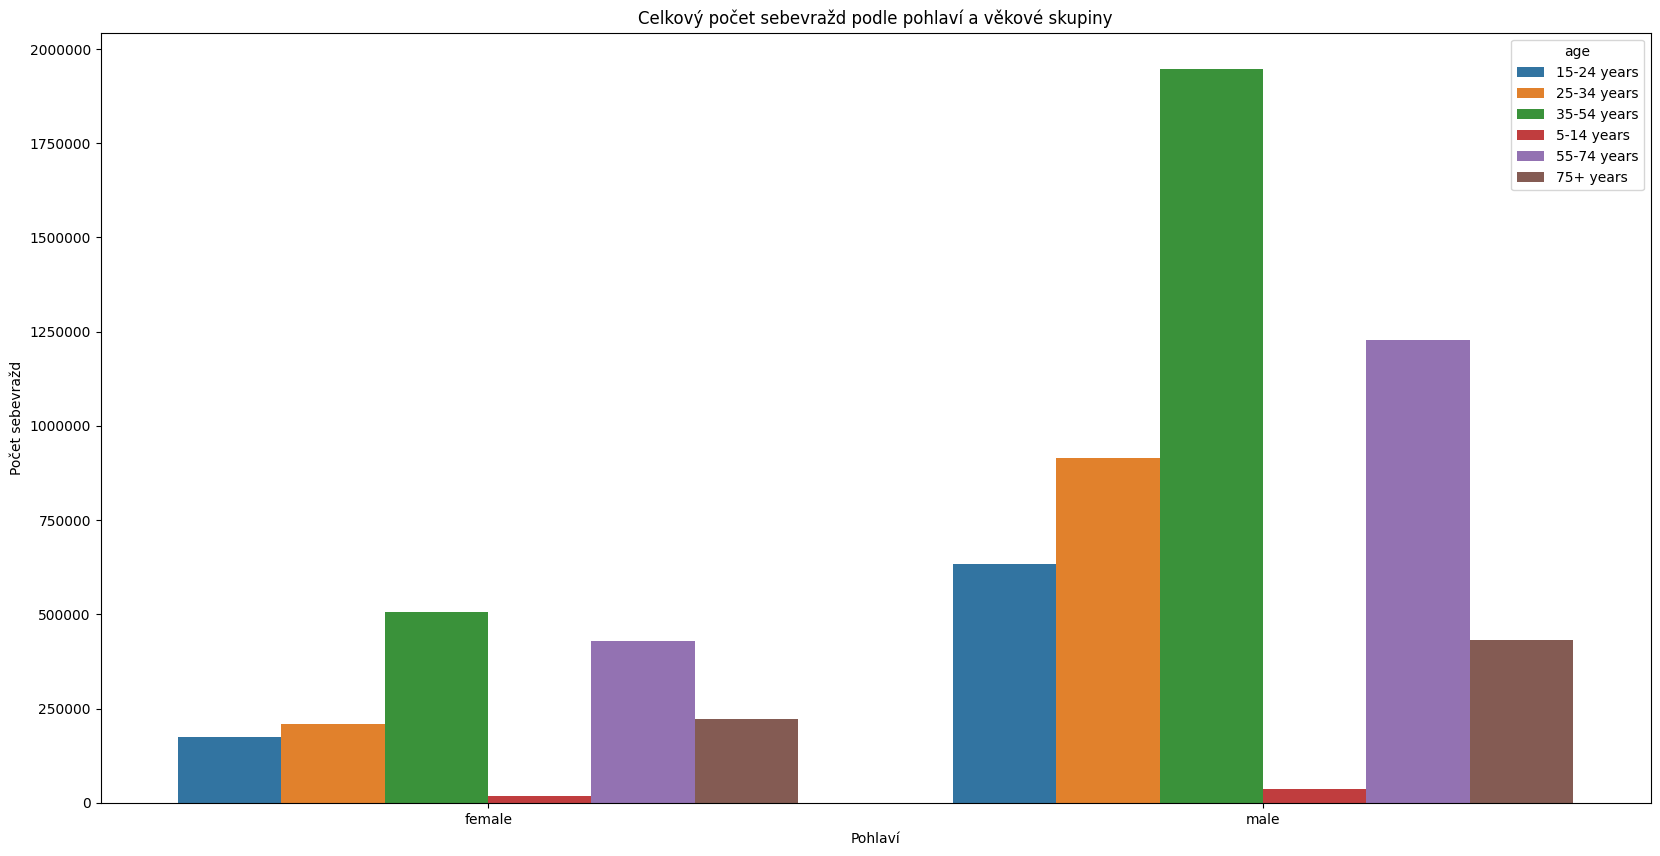

In [23]:
# Graf 6
seskupeny3 = df.groupby(['sex', 'age'])['suicides_no'].sum().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='sex', y='suicides_no', hue='age', data=seskupeny3)
plt.xlabel('Pohlaví')
plt.ylabel('Počet sebevražd')
plt.title('Celkový počet sebevražd podle pohlaví a věkové skupiny')
plt.ticklabel_format(style='plain', axis='y')
plt.show()